In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker


In [3]:
import pandas as pd

# Read the text file
                   
df = pd.read_csv('../DataCollection/Calibration_1_28_2024/Calibration_1_28_2024.txt')  # replace '\t' with your delimiter

# Save the DataFrame as a CSV file
df.to_csv('../DataCollection/Calibration_1_28_2024/Calibration_1_28_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data
0,12:39:39.084,RX,Pressure values:
1,12:39:39.085,RX,1.16
2,12:39:39.205,RX,Pressure values:
3,12:39:39.206,RX,1.16
4,12:39:39.324,RX,Pressure values:


In [4]:
# Now try selecting the 'Data' column
df = df.loc[df['Data'] != 'Pressure values:']
# Create a new column 'Sample' with values from 1 to the number of rows
df['Sample'] = range(1, len(df) + 1)

# Save the DataFrame as a CSV file
df.to_csv('../DataCollection/Calibration_1_28_2024/Calibration_1_28_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame 

,Timestamp,Mode,Data,Sample
1,12:39:39.085,RX,1.16,1
3,12:39:39.206,RX,1.16,2
5,12:39:39.326,RX,1.06,3
7,12:39:39.444,RX,1.26,4
9,12:39:39.565,RX,0.96,5


In [5]:
df.tail()

,Timestamp,Mode,Data,Sample
9833,12:49:43.354,RX,69.55,4918
9835,12:49:43.474,RX,69.45,4919
9837,12:49:43.594,RX,69.25,4920
9838,12:49:43.671,TX,q,4921
9840,12:49:43.714,RX,69.55,4922


In [6]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



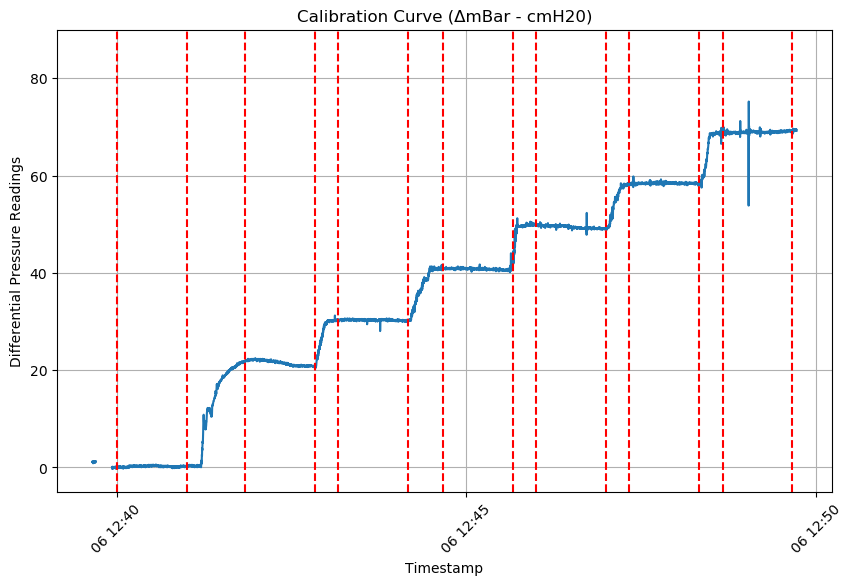

In [7]:

# Define start and end time
start_time = pd.to_datetime('12:39:00')
end_time = pd.to_datetime('12:49:50')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'Data' without warnings
filtered_df.loc[:, 'Data'] = pd.to_numeric(filtered_df['Data'], errors='coerce')

# Define the times to plot vertical lines at
times = ['12:40:00', '12:41:00', '12:41:50', '12:42:50', '12:43:10', '12:44:10', '12:44:40', '12:45:40', '12:46:00', '12:47:00', '12:47:20', '12:48:20', '12:48:40', '12:49:40']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['Data'])

# Plot vertical lines at the specified times
for i, t in enumerate(times):
     plt.axvline(x=t, color='r', linestyle='--')
#     if i % 2 == 0:  # for the first, third, fifth, etc. lines
#         plt.text(t, 75, labels[i//2], rotation=90, va='bottom', ha='right')  # adjust -5 and 'bottom' as needed

# Set the title and labels
plt.title('Calibration Curve (ΔmBar - cmH20)')
plt.xlabel('Timestamp')
plt.ylabel('Differential Pressure Readings')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
plt.ylim(float('-5'), float('90'))

# Add a grid
plt.grid(True)

plt.savefig('Calibration_1_28_2024.png')
# Show the plot
plt.show()

Slope: 10.68
Intercept: 6.49
R-squared: 0.9772


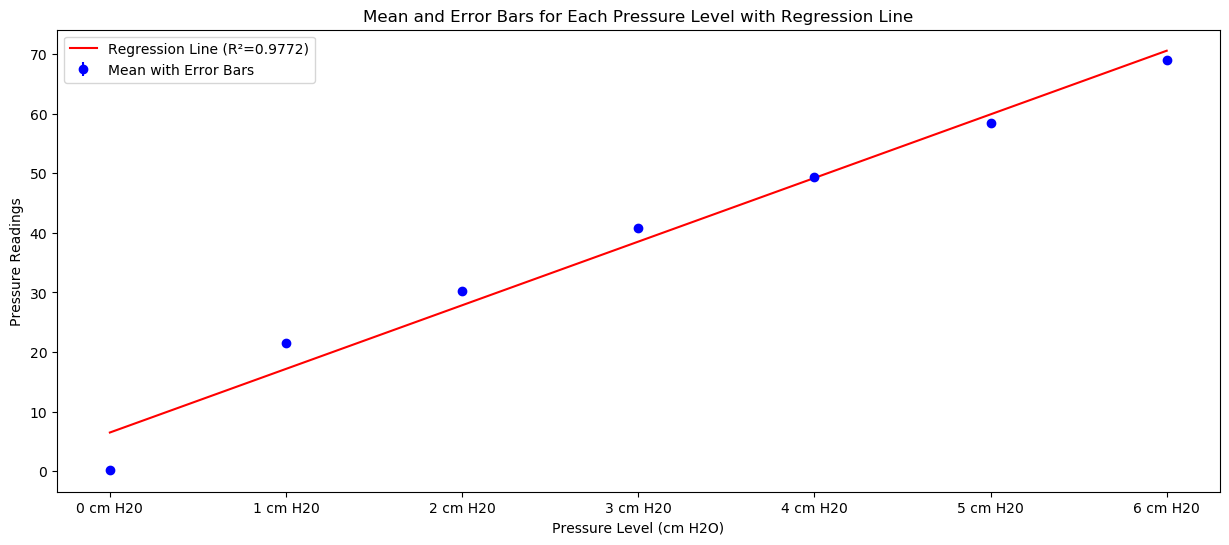

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Define start and end time
start_time = pd.to_datetime('12:39:00')
end_time = pd.to_datetime('12:49:50')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

# Convert 'differential pressure value' to numeric, handling errors
filtered_df.loc[:, 'Data'] = pd.to_numeric(filtered_df['Data'], errors='coerce')

# Define the times to plot vertical lines at
times = ['12:40:00', '12:41:00', '12:41:50', '12:42:50', '12:43:10', '12:44:10', '12:44:40', '12:45:40', '12:46:00', '12:47:00', '12:47:20', '12:48:20', '12:48:40', '12:49:40']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Initialize lists to store mean and std values for each pressure level
mean_values = []
std_values = []

# Loop through each pressure level
for i in range(0, len(times)-1, 2):
    # Filter data for the specific time interval
    pressure_level_data = filtered_df[(filtered_df['Timestamp'] >= times[i]) & (filtered_df['Timestamp'] <= times[i+1])]
    
    # Calculate mean and std for the filtered data
    mean_value = pressure_level_data['Data'].mean()
    std_value = pressure_level_data['Data'].std()
    
    # Append mean and std values to the lists
    mean_values.append(mean_value)
    std_values.append(std_value)


# Perform linear regression to fit a line
slope, intercept, r_value, p_value, std_err = linregress(range(len(labels)), mean_values)

# Calculate R-squared
r_squared = r_value**2

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(15, 6))

# Plot mean values with error bars
plt.errorbar(labels, mean_values, yerr=std_values, fmt='o', color='b', label='Mean with Error Bars')

# Plot the regression line
plt.plot(labels, [intercept + slope * i for i in range(len(labels))], color='r', label=f'Regression Line (R²={r_squared:.4f})')

# Set the title and labels
plt.title('Mean and Error Bars for Each Pressure Level with Regression Line')
plt.xlabel('Pressure Level (cm H2O)')
plt.ylabel('Pressure Readings')

# Add a legend
plt.legend()



# Display the calculated values
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_squared:.4f}')


plt.savefig('Calibration_1_30_2024_2.png')

plt.show()

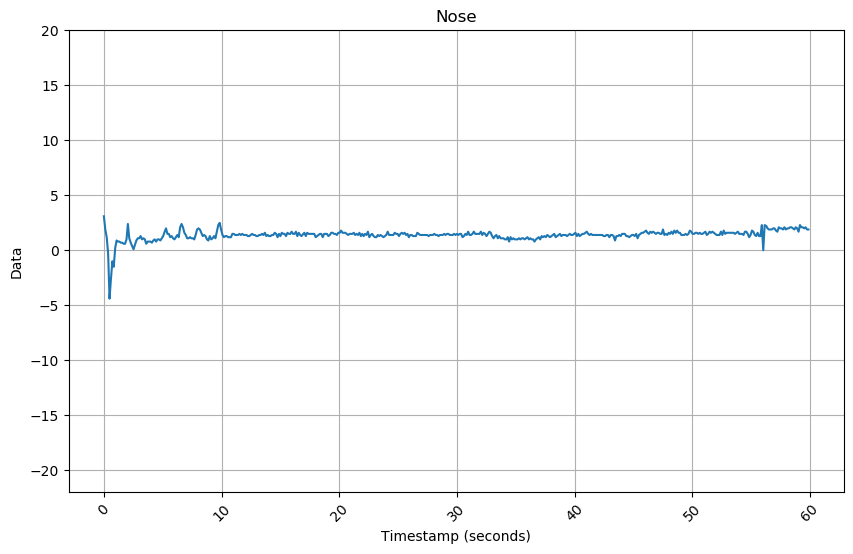

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define start and end time
start_time = pd.to_datetime('10:43:00').time()
end_time = pd.to_datetime('10:44:00').time()

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'].dt.time >= start_time) & (filtered_df['Timestamp'].dt.time <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'Data' without warnings
filtered_df.loc[:, 'Data'] = pd.to_numeric(filtered_df['Data'], errors='coerce')

# Transform the time into seconds and make it start from 0
filtered_df['Timestamp'] = (filtered_df['Timestamp'] - filtered_df['Timestamp'].min()).dt.total_seconds()

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['Data'])

# Set the title and labels
plt.title('Nose')
plt.xlabel('Timestamp (seconds)')
plt.ylabel('Data')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
plt.ylim(float('-22'), float('20'))

# Add a grid
plt.grid(True)

plt.savefig('Nose_1_26_2024.png')

# Show the plot
plt.show()